# Airline Passenger Satisfaction

## Exploring Dataset 

In [269]:
# import libraries: -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler,MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [270]:
# load the dataset: -
train_data = pd.read_csv('Dataset/train.csv', index_col='Unnamed: 0')
test_data = pd.read_csv('Dataset/test.csv', index_col='Unnamed: 0')

# drop the id column (We dont need it here): -
train_data.drop(['id'], axis=1, inplace=True)
test_data.drop(['id'], axis=1, inplace=True)

In [271]:
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [272]:
test_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [273]:
train_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [274]:
test_data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [275]:
# Getting the catagorial features: - 
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        print(col)
        print(train_data[col].unique())
        print('\n')

Gender
['Male' 'Female']


Customer Type
['Loyal Customer' 'disloyal Customer']


Type of Travel
['Personal Travel' 'Business travel']


Class
['Eco Plus' 'Business' 'Eco']


satisfaction
['neutral or dissatisfied' 'satisfied']




In [276]:
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

In [277]:
train_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,3,1,5,3,5,5,...,5,5,25,18.0,True,False,True,False,True,False
1,25,235,3,2,3,3,1,3,1,1,...,4,1,1,6.0,True,True,False,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,5,0,0.0,False,False,False,False,False,True
3,25,562,2,5,5,5,2,2,2,2,...,4,2,11,9.0,False,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,0,0.0,True,False,False,False,False,True


## Checking Nan, Duplicates, INF

In [278]:
# Checking for duplicates: -
print("Number of duplicates in train data is",train_data.duplicated().sum())
print("Number of duplicates in test data is",test_data.duplicated().sum())

Number of duplicates in train data is 0
Number of duplicates in test data is 0


- No Duplicates Observed ✅

In [279]:
# Checking for missing values %: -
na_train_percentage = [(col, train_data[col].isna().sum() / len(train_data) * 100) for col in train_data.columns]
na_train_percentage = pd.DataFrame(na_train_percentage, columns=['Feature', 'Null%']).sort_values(by='Null%', ascending=False)
na_train_percentage

,Feature,Null%
17,Arrival Delay in Minutes,0.298352
0,Age,0.000000
1,Flight Distance,0.000000
22,Class_Eco Plus,0.000000
21,Class_Eco,0.000000
20,Type of Travel_Personal Travel,0.000000
19,Customer Type_disloyal Customer,0.000000
18,Gender_Male,0.000000
16,Departure Delay in Minutes,0.000000
15,Cleanliness,0.000000


In [280]:
na_test_percentage = [(col, test_data[col].isna().sum() / len(test_data) * 100) for col in test_data.columns]
na_test_percentage = pd.DataFrame(na_test_percentage, columns=['Feature', 'Null%']).sort_values(by='Null%', ascending=False)
na_test_percentage

,Feature,Null%
17,Arrival Delay in Minutes,0.319526
0,Age,0.000000
1,Flight Distance,0.000000
22,Class_Eco Plus,0.000000
21,Class_Eco,0.000000
20,Type of Travel_Personal Travel,0.000000
19,Customer Type_disloyal Customer,0.000000
18,Gender_Male,0.000000
16,Departure Delay in Minutes,0.000000
15,Cleanliness,0.000000


- As you can see the `Arrival Delay in Minutes` has `29% <--> 31%` nan values

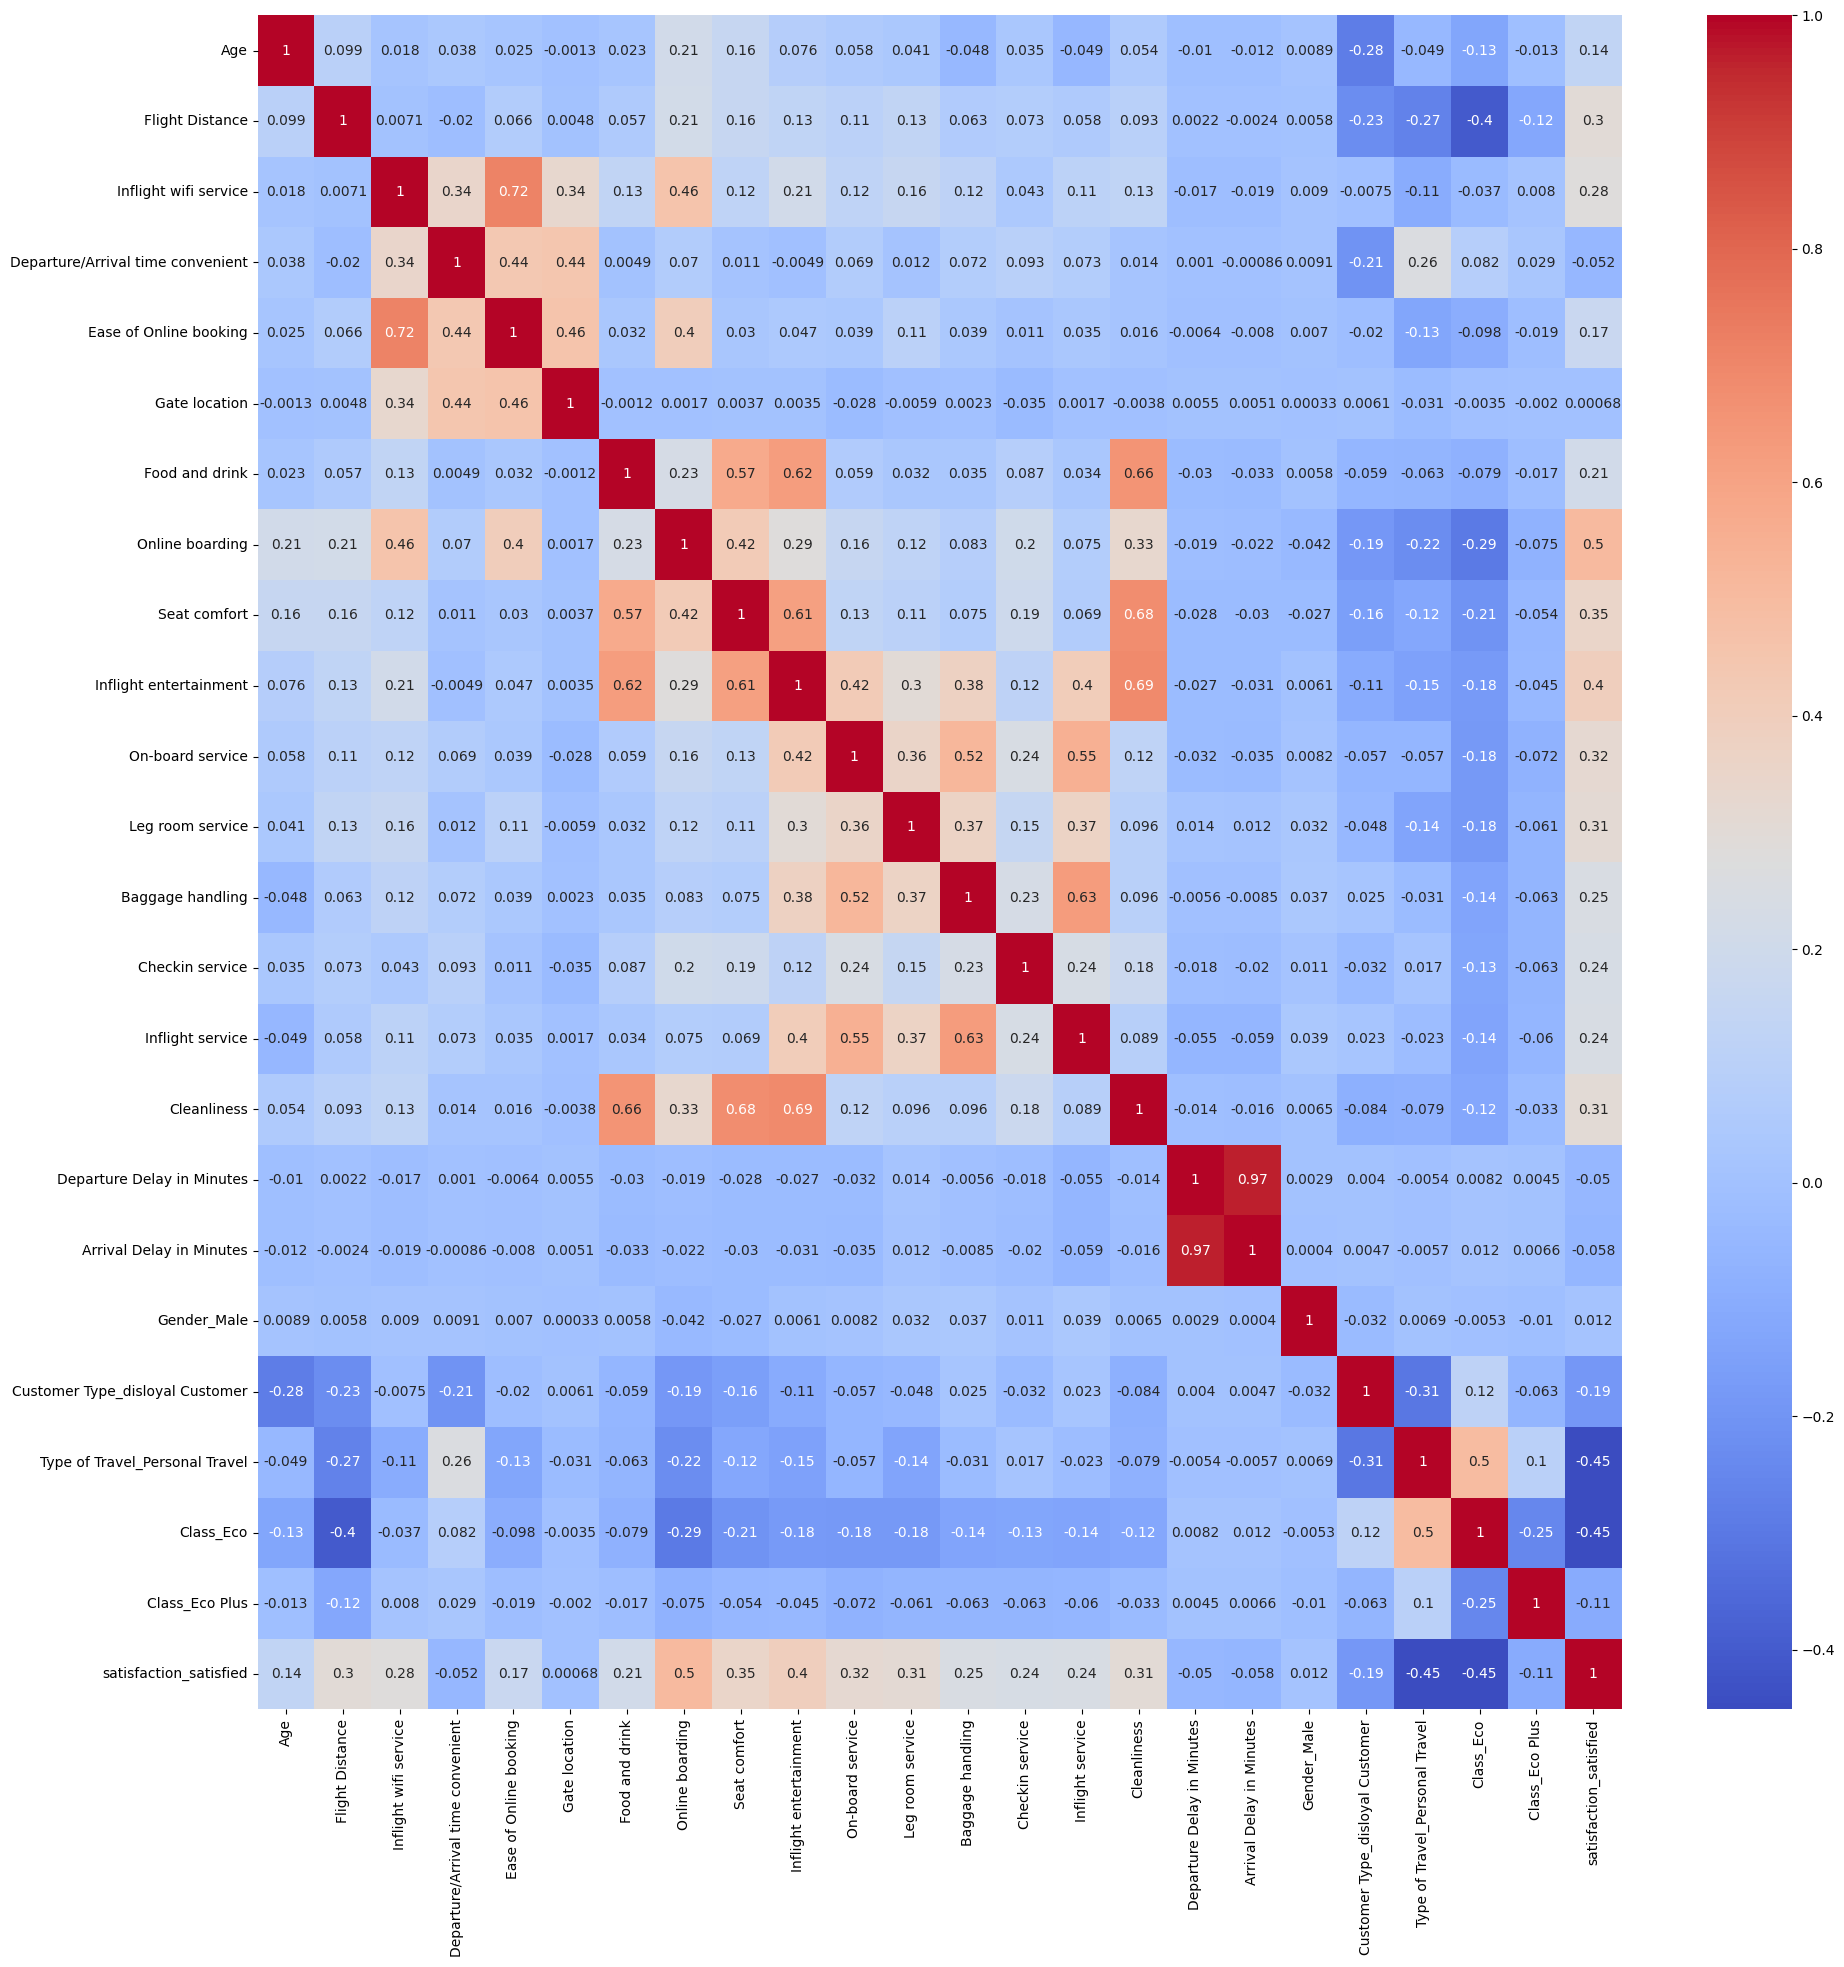

In [281]:
# correlation matrix: -
corr = train_data.corr()
plt.figure(figsize=(22, 22))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

- However the Arrival Delay is **highly correlated** with Departure Delay which cause ``redundancy``, So we gonna drop it

- We can see this also between Wifi Service & Online Booking so we gonna drop Online Booking (The lesser correlation with satisfaction)

- We can see that the satisfaction is **``not``** correlated with `Gate location`

In [282]:
train_data.drop(['Arrival Delay in Minutes','Ease of Online booking','Gate location'], axis=1, inplace=True)
test_data.drop(['Arrival Delay in Minutes','Ease of Online booking','Gate location'], axis=1, inplace=True)

In [283]:
# Converting the all data to Int: -
train_data = train_data.astype(int)
test_data = test_data.astype(int)

train_data.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,3,4,5,3,5,5,4,3,...,4,5,5,25,1,0,1,0,1,0
1,25,235,3,2,1,3,1,1,1,5,...,1,4,1,1,1,1,0,0,0,0
2,26,1142,2,2,5,5,5,5,4,3,...,4,4,5,0,0,0,0,0,0,1
3,25,562,2,5,2,2,2,2,2,5,...,1,4,2,11,0,0,0,0,0,0
4,61,214,3,3,4,5,5,3,3,4,...,3,3,3,0,1,0,0,0,0,1


## Checking Data Skewness

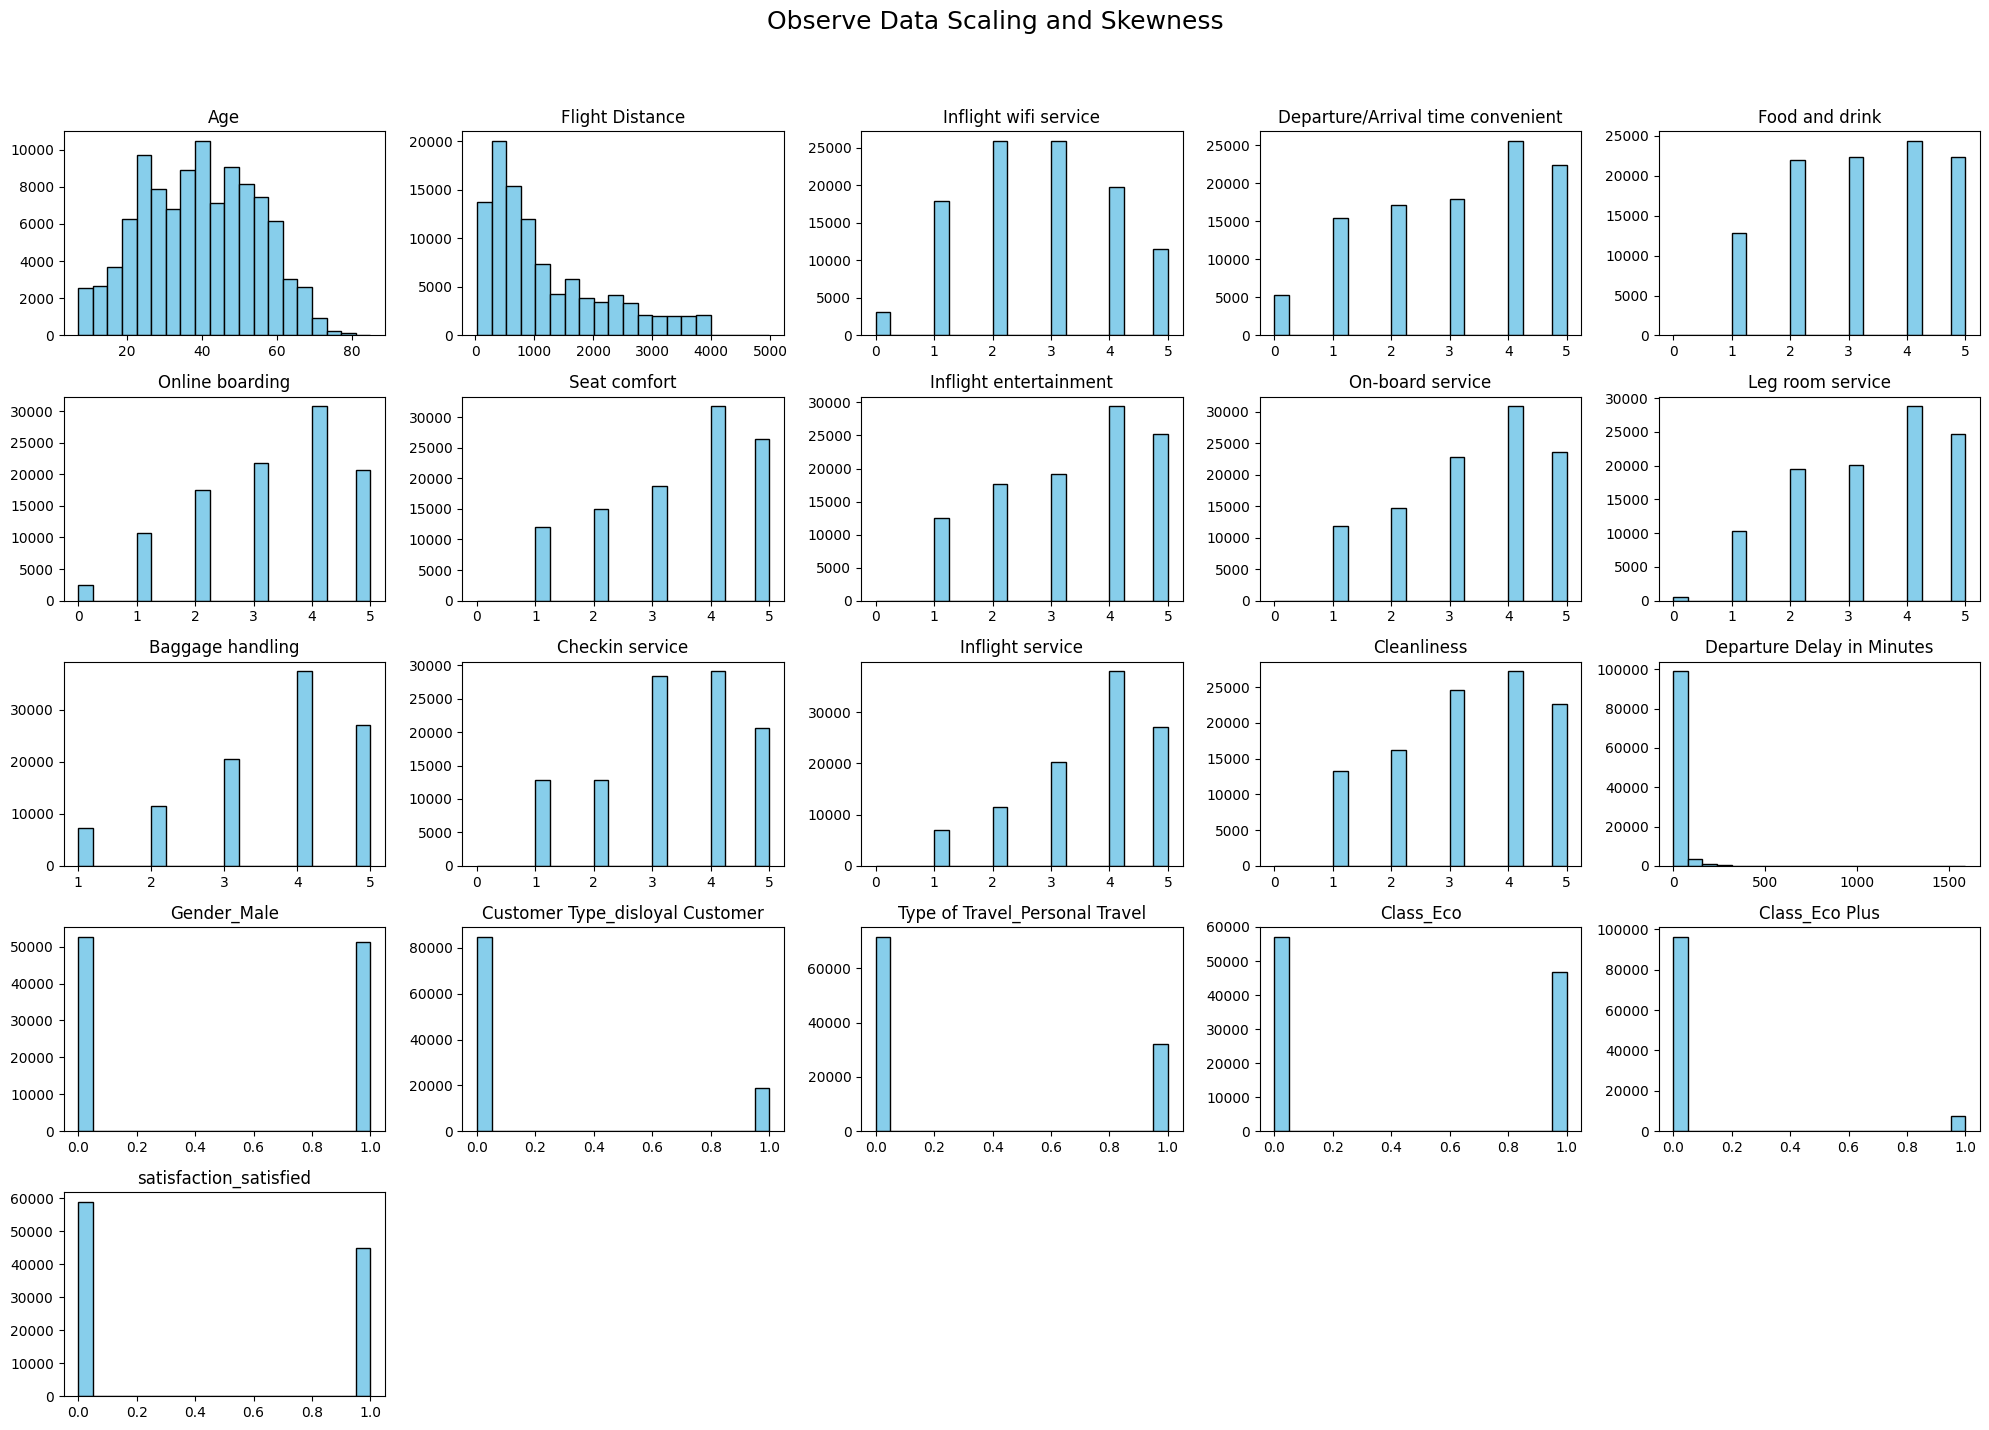

In [284]:
n_columns = len(train_data.columns)

# Set the number of columns in the grid
n_cols = 5

# Calculate the number of rows needed
n_rows = (n_columns // n_cols) + int(n_columns % n_cols != 0)

# Adjust figure size based on the number of rows and columns
plt.figure(figsize=(n_cols * 4, n_rows * 3))  
plt.suptitle('Observe Data Scaling and Skewness', fontsize=18)

for i, col in enumerate(train_data.columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    plt.hist(train_data[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [285]:
train_data.skew()

Age                                 -0.004516
Flight Distance                      1.109466
Inflight wifi service                0.040408
Departure/Arrival time convenient   -0.334399
Food and drink                      -0.151279
Online boarding                     -0.453852
Seat comfort                        -0.482775
Inflight entertainment              -0.365131
On-board service                    -0.420031
Leg room service                    -0.350231
Baggage handling                    -0.677040
Checkin service                     -0.364982
Inflight service                    -0.690314
Cleanliness                         -0.300074
Departure Delay in Minutes           6.733980
Gender_Male                          0.029839
Customer Type_disloyal Customer      1.642465
Type of Travel_Personal Travel       0.819761
Class_Eco                            0.201472
Class_Eco Plus                       3.308021
satisfaction_satisfied               0.269076
dtype: float64

In [286]:
# Fixing the skewness: -
train_data['Flight Distance'] = np.log1p(train_data['Flight Distance'])
train_data['Departure Delay in Minutes'] = np.log1p(train_data['Departure Delay in Minutes'])

test_data['Flight Distance'] = np.log1p(test_data['Flight Distance'])
test_data['Departure Delay in Minutes'] = np.log1p(test_data['Departure Delay in Minutes'])

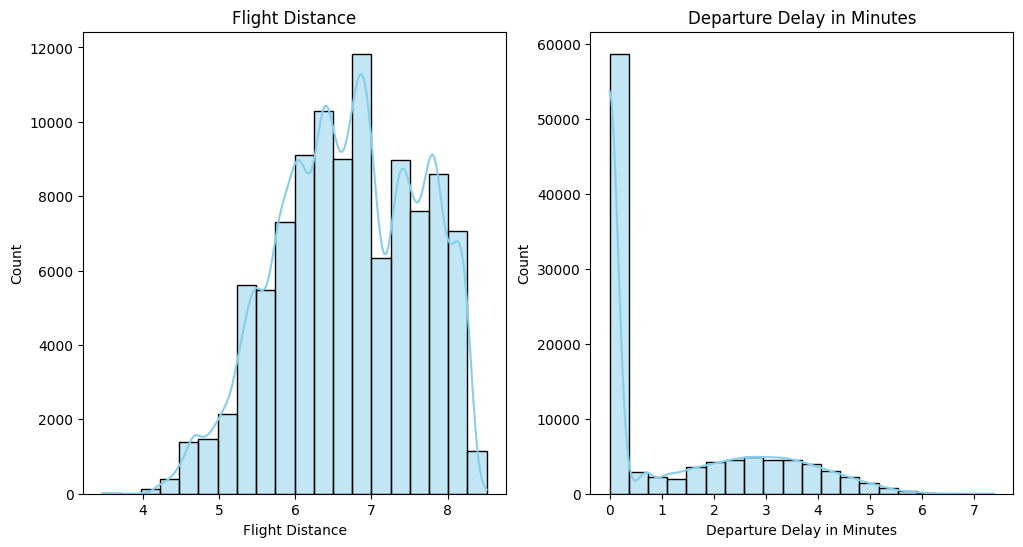

In [287]:
# Draw Age and Flight Distance after fixing the skewness: -
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_data['Flight Distance'], bins=20, color='skyblue', kde=True)
plt.title('Flight Distance')
plt.subplot(1, 2, 2)
sns.histplot(train_data['Departure Delay in Minutes'], bins=20, color='skyblue', kde=True)
plt.title('Departure Delay in Minutes')
plt.show()


In [288]:
scaler = MinMaxScaler()

In [289]:
Scaled_train=train_data.copy()
Scaled_test=test_data.copy()

Scaled_train[['Age','Flight Distance','Departure Delay in Minutes']] = scaler.fit_transform(train_data[['Age','Flight Distance','Departure Delay in Minutes']])
Scaled_test[['Age','Flight Distance','Departure Delay in Minutes']] = scaler.transform(test_data[['Age','Flight Distance','Departure Delay in Minutes']])
Scaled_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.076923,0.528433,3,4,5,3,5,5,4,3,...,4,5,5,0.441873,1,0,1,0,1,0
1,0.230769,0.395800,3,2,1,3,1,1,1,5,...,1,4,1,0.094007,1,1,0,0,0,0
2,0.243590,0.708300,2,2,5,5,5,5,4,3,...,4,4,5,0.000000,0,0,0,0,0,1
3,0.230769,0.568027,2,5,2,2,2,2,2,5,...,1,4,2,0.337011,0,0,0,0,0,0
4,0.692308,0.377339,3,3,4,5,5,3,3,4,...,3,3,3,0.000000,1,0,0,0,0,1


In [290]:
# preparing the data for the model: -
X_train = Scaled_train.drop(['satisfaction_satisfied'], axis=1)
Y_train = Scaled_train['satisfaction_satisfied']

# preparing the test data: -
X_test = Scaled_test.drop(['satisfaction_satisfied'], axis=1)
Y_test = Scaled_test['satisfaction_satisfied']

X_train.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.076923,0.528433,3,4,5,3,5,5,4,3,4,4,5,5,0.441873,1,0,1,0,1
1,0.230769,0.395800,3,2,1,3,1,1,1,5,3,1,4,1,0.094007,1,1,0,0,0
2,0.243590,0.708300,2,2,5,5,5,5,4,3,4,4,4,5,0.000000,0,0,0,0,0
3,0.230769,0.568027,2,5,2,2,2,2,2,5,3,1,4,2,0.337011,0,0,0,0,0
4,0.692308,0.377339,3,3,4,5,5,3,3,4,4,3,3,3,0.000000,1,0,0,0,0


In [291]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0.076923,0.528433,3,4,5,3,5,5,4,3,4,4,5,5,0.441873,1,0,1,0,1
1,0.230769,0.395800,3,2,1,3,1,1,1,5,3,1,4,1,0.094007,1,1,0,0,0
2,0.243590,0.708300,2,2,5,5,5,5,4,3,4,4,4,5,0.000000,0,0,0,0,0
3,0.230769,0.568027,2,5,2,2,2,2,2,5,3,1,4,2,0.337011,0,0,0,0,0
4,0.692308,0.377339,3,3,4,5,5,3,3,4,4,3,3,3,0.000000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0.205128,0.355956,2,1,2,2,2,2,3,1,4,2,3,2,0.188014,0,1,0,1,0
103900,0.538462,0.850905,4,4,2,4,5,5,5,5,5,5,5,4,0.000000,1,0,0,0,0
103901,0.294872,0.818732,1,1,4,1,5,4,3,2,4,5,5,4,0.282020,1,1,0,0,0
103902,0.192308,0.682022,1,1,1,1,1,1,4,5,1,5,4,1,0.000000,0,1,0,1,0


## Checking Outliers

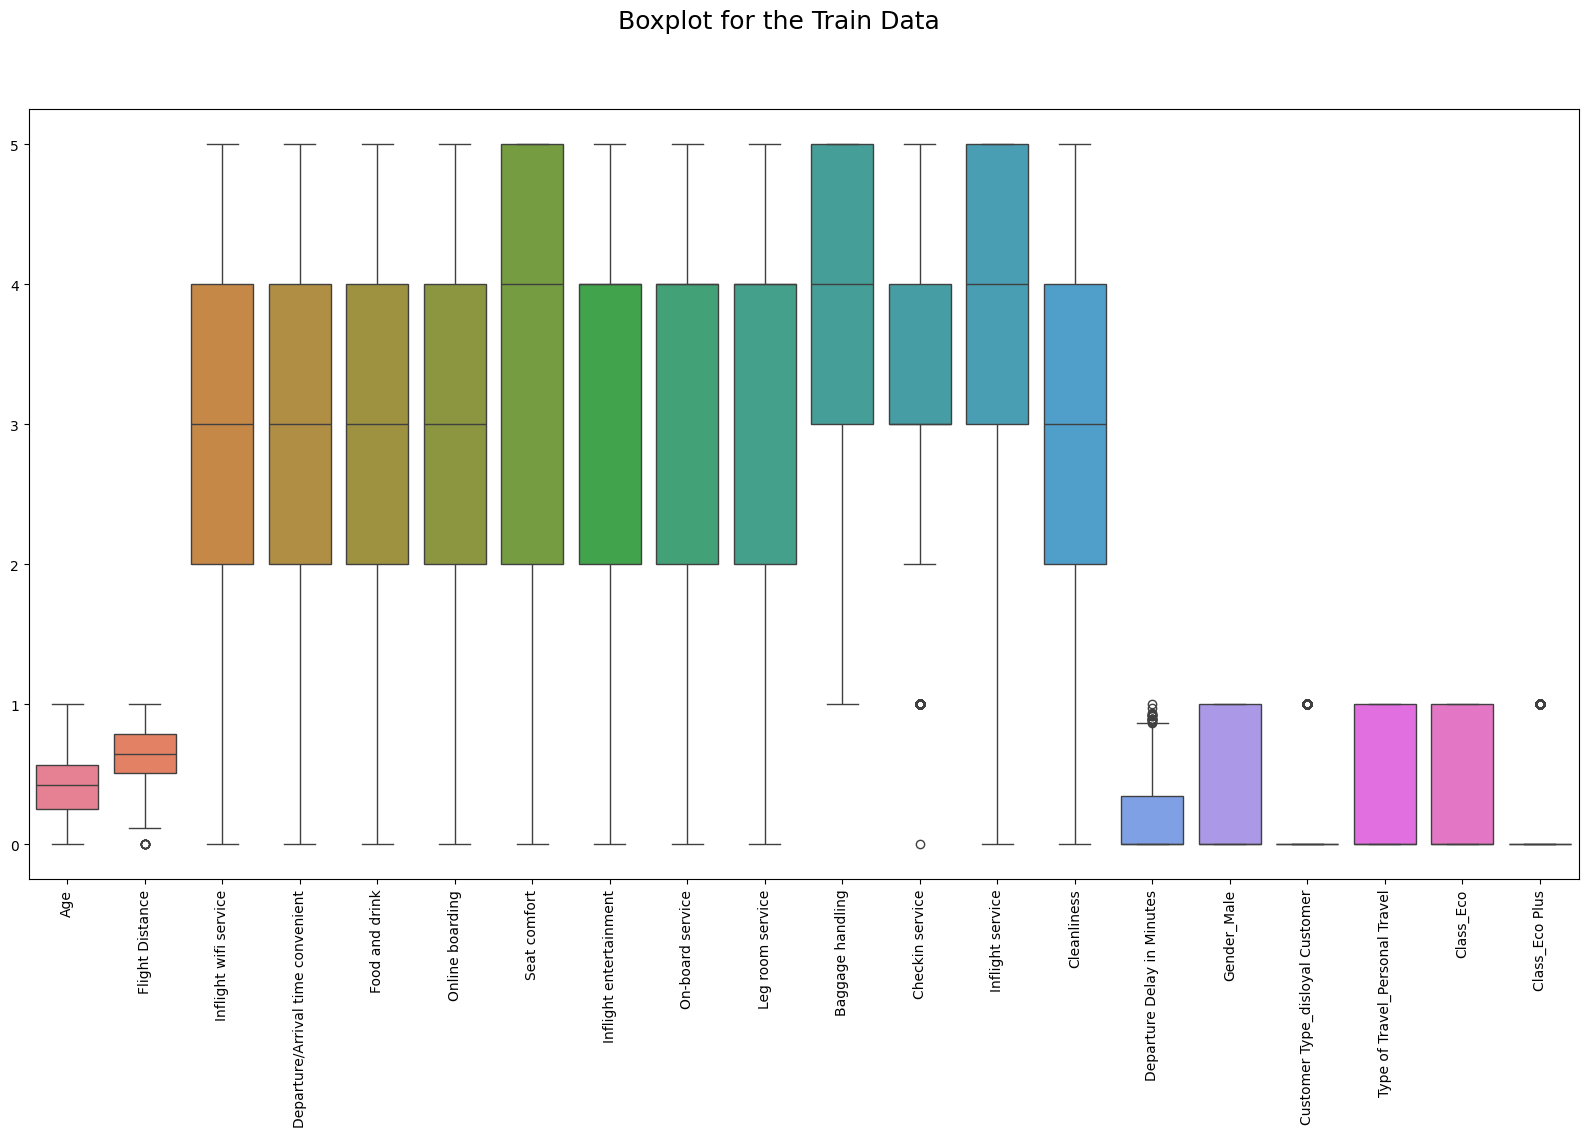

In [292]:
# boxplot for the train data: -
plt.figure(figsize=(20, 10))
plt.suptitle('Boxplot for the Train Data', fontsize=18)
sns.boxplot(data=X_train)
plt.xticks(rotation=90)
plt.show()


In [293]:
# Train the model: -
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [294]:
# Make predictions
Y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9626193409300893
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

